# 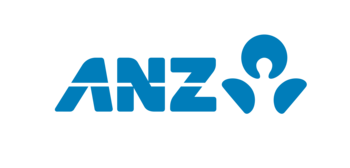 ANZ Analytics by Renzo https://nextslim.github.io/RenzOnly/ <hr>

Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?

Put together 2-3 slides summarising your most interesting findings to ANZ management.

### Import Dependencies

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import seaborn as sns
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px


### Loading the Data

In [23]:
# Create a reference to the Xlsx and import it into a Pandas DataFrame
df = pd.read_excel("ANZdataset.xlsx")
df.head()

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

        long_lat txn_description                           merchant_id  \
0  153.41 -27.95             POS  81c48296-73be-44a7-befa-d053f48ce7cd   
1  153.41 -27.95       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e   
2  151.23 -33.94             POS  835c231d-8cdf-4e96-859d-e9d571760cf0   
3  153.10 -27.66       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673   
4  153.41 -27.95       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0   

   merchant_code first_name  ...  age merchant_suburb merchant_state  \
0            NaN      Diana  ...   26         Ashmore            QLD   
1            NaN      Diana  ...   26          Sydney            NSW   
2            NaN    Michael  ...   38          Sydney            NSW   
3            NaN     Rhonda  ...   40         Buderim            QLD   
4            NaN      Diana  ...   26   Mermaid Beach            QLD   

                     extraction amount                    transaction_id  \
0  2018-08-01T01:01:15.000+0000  16.25  a623070bfead4541a6b0fff8a09e706c   
1  2018-08-01T01:13:45.000+0000  14.19  13270a2a902145da9db4c951e04b51b9   
2  2018-08-01T01:26:15.000+0000   6.42  feb79e7ecd7048a5a36ec889d1a94270   
3  2018-08-01T01:38:45.000+0000  40.90  2698170da3704fd981b15e64a006079e   
4  2018-08-01T01:51:15.000+0000   3.25  329adf79878c4cf0aeb4188b4691c266   

     country     customer_id merchant_long_lat movement  
0  Australia  CUS-2487424745     153.38 -27.99    debit  
1  Australia  CUS-2487424745     151.21 -33.87    debit  
2  Australia  CUS-2142601169     151.21 -33.87    debit  
3  Australia  CUS-1614226872     153.05 -26.68    debit  
4  Australia  CUS-2487424745     153.44 -28.06    debit  

[5 rows x 23 columns]

### General Analysis of the Data

In [24]:
# Exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [25]:
# Generate descriptive statistics
df.describe()

card_present_flag  merchant_code        balance           age  \
count        7717.000000          883.0   12043.000000  12043.000000   
mean            0.802644            0.0   14704.195553     30.582330   
std             0.398029            0.0   31503.722652     10.046343   
min             0.000000            0.0       0.240000     18.000000   
25%             1.000000            0.0    3158.585000     22.000000   
50%             1.000000            0.0    6432.010000     28.000000   
75%             1.000000            0.0   12465.945000     38.000000   
max             1.000000            0.0  267128.520000     78.000000   

             amount  
count  12043.000000  
mean     187.933588  
std      592.599934  
min        0.100000  
25%       16.000000  
50%       29.000000  
75%       53.655000  
max     8835.980000

 ### Cleaning <hr>

In [26]:
#checking if there are any missing values in the entire data set 
df.isnull().values.any()

True

#### Missing Data Heatmap

<AxesSubplot:title={'center':'Data Heatmap for the Missing data in the data set'}>

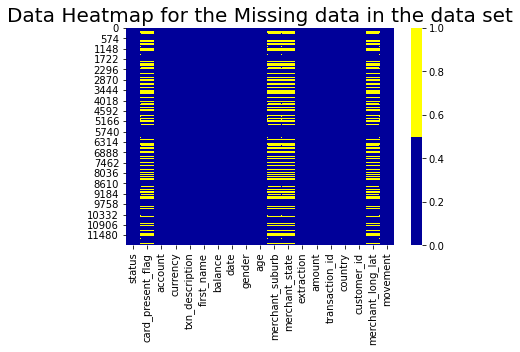

In [58]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
plt.title('Data Heatmap for the Missing data in the data set', fontsize=20)
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#### Missing Data Percentage List

In [28]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

status - 0%
card_present_flag - 36%
bpay_biller_code - 93%
account - 0%
currency - 0%
long_lat - 0%
txn_description - 0%
merchant_id - 36%
merchant_code - 93%
first_name - 0%
balance - 0%
date - 0%
gender - 0%
age - 0%
merchant_suburb - 36%
merchant_state - 36%
extraction - 0%
amount - 0%
transaction_id - 0%
country - 0%
customer_id - 0%
merchant_long_lat - 36%
movement - 0%


 #### Removing columns which gives no valuable analysis

In [29]:
#bpay_biller_code and merchant code has 90% NA values. 
#For better analysis either dropping them or ignoring them is best to do.
empty = ['merchant_id', 'bpay_biller_code', 'merchant_code', 'long_lat']
df.drop(empty, axis = 1, inplace = True)

 #### Check outliers by using scatter plot

There are some outliers like values but they are transations above the average. There is not need to remove them


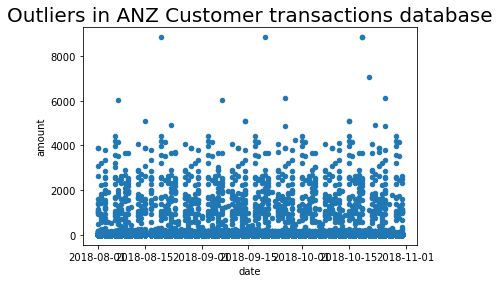

In [60]:
df.plot(kind='scatter', x='date', y='amount')
plt.title('Outliers in ANZ Customer transactions database', fontsize=20)
print("There are some outliers like values but they are transations above the average. There is not need to remove them")

### General Analysis of the Data/Wrangling the data and calculating a balance history <hr>

#### Average number of transaction amount

In [31]:
# Finding the average number of transaction amount
average_transaction_amount = df["amount"].mean()
average_transaction_amount

# Print
print('The average number of transaction amounts for August, September and  October is' ,(average_transaction_amount))


The average number of transaction amounts for August, September and  October is 187.93358797641767


#### Summary Table 

In [32]:
print(df.columns)

Index(['status', 'card_present_flag', 'account', 'currency', 'txn_description',
       'first_name', 'balance', 'date', 'gender', 'age', 'merchant_suburb',
       'merchant_state', 'extraction', 'amount', 'transaction_id', 'country',
       'customer_id', 'merchant_long_lat', 'movement'],
      dtype='object')


In [33]:
# Unique items
customers = df['customer_id'].nunique()
# Average amount
average_amount=df['amount'].mean()
# Purchase_count
transaction_count=df['transaction_id'].nunique()
#Total amount
total_amount=df['amount'].sum()

# Assign to a dataframe for output
summary_table_df=pd.DataFrame({'Number of Unique customers': [customers] ,
              'Number of Transactions': [transaction_count],
               'Average Amount': ['${:,.2f}'.format(average_amount)] ,
              'Total amount':['${:,.2f}'.format(total_amount)]})
              
summary_table_df.head()

Number of Unique customers  Number of Transactions Average Amount  \
0                         100                   12043        $187.93   

    Total amount  
0  $2,263,284.20

 #### Gender Demographics

 #### Numbers male versus female in transaction dataset?  

In [75]:
# Total # of consumers by gender.
print("Cusumers by SEX")
print(df['gender'].value_counts())
print("*"*20)
print("% by SEX")
print(((df['gender'].value_counts() / len(df['gender'])).round(3)*100))


Cusumers by SEX
M    6285
F    5758
Name: gender, dtype: int64
********************
% by SEX
M    52.2
F    47.8
Name: gender, dtype: float64


 #### What is % for male versus female in transaction dataset?

In [62]:
#checking the count of month wise transaction 
explode=(0.1,0.05,0.05)
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('% Males & Female in ANZ Customer Transactions Database', fontsize=20)
plt.show()

 ####  Age Analysis

C:\Users\zaax\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



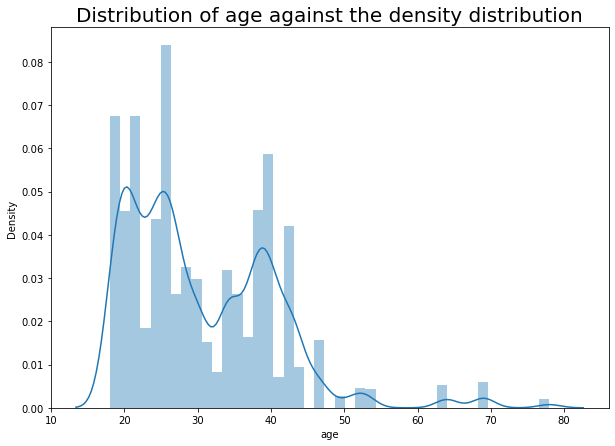

In [54]:
plt.figure(figsize=(10,7))
plt.title('Distribution of age against the density distribution', fontsize=20)
sns.distplot(df['age']);

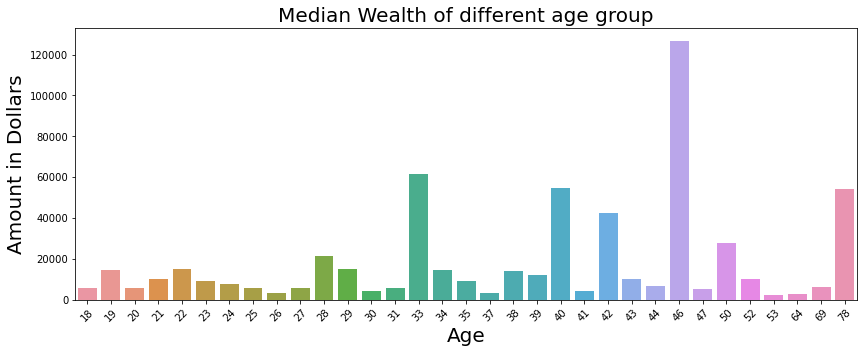

In [55]:
wealthy_age_group = df.groupby(['age',], as_index = False)['balance'].mean()
# .sort_values(by='balance', ascending = False)
# print(wealthy_age_group)
plt.figure(figsize=(14,5))
sns.barplot(x= wealthy_age_group.age, y= wealthy_age_group.balance)                              
plt.xlabel('Age', fontsize=20)
plt.ylabel('Amount in Dollars', fontsize=20)
plt.title('Median Wealth of different age group', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [79]:
# Average age
average_age=df['age'].mean()
print(average_age)

30.5823299842232


#### Date Analysis  <hr>

In [98]:
df.date.value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

 #### Transaction amount by Month

In [65]:
#  How many transactions do customers make per  month?
df['Month'] = pd.DatetimeIndex(df['date']).month_name()
response_data_frame = df.groupby('Month')['Month'].value_counts()
response_data_frame.head()

Month      Month    
August     August       3943
October    October      4087
September  September    4013
Name: Month, dtype: int64

In [66]:
#  How many transactions do customers make per  month Avaerage?
amount = df[df['amount'] <= 110]
month = amount.groupby('Month').mean()['amount'].reset_index()
month

Month     amount
0     August  28.850661
1    October  29.549315
2  September  29.719659

#### Monthly % balance

October      4087
September    4013
August       3943
Name: Month, dtype: int64


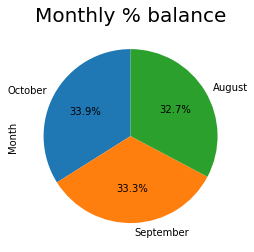

In [76]:
#checking the count of month wise transaction 
print(df['Month'].value_counts())
explode=(0.1,0.05,0.05)
df['Month'].value_counts().plot.pie(autopct='%.1f%%', startangle=90)
plt.title('Monthly % balance', fontsize=20)
ax.legend(frameon=True, bbox_to_anchor=(1,0.9))
plt.show()

 #### Salary vs Spending

Total Salary: 1676576.85
Total Spending: 586707.35


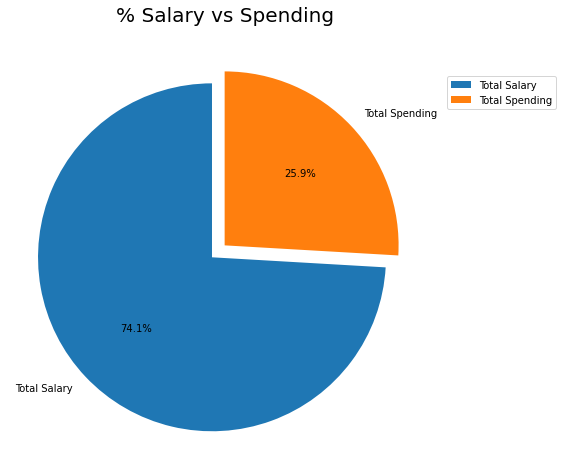

In [69]:
# Salary vs Spending

total_salary = df.amount[(df.movement == "credit")].sum() 
total_spending = df.amount[(df.movement == "debit")].sum()
print("Total Salary:",total_salary)
print("Total Spending:", total_spending)
pie = [total_salary, total_spending]
fig, ax = plt.subplots(figsize=(12,8))
label = ['Total Salary',
        'Total Spending']
explode = (0.1, 0)
ax.pie(pie, autopct="%.1f%%", labels =  label, explode = explode,startangle=90 )
plt.title('% Salary vs Spending', fontsize=20)
ax.legend(frameon=True, bbox_to_anchor=(1,0.9))
plt.show()

 #### Categorical  Analysis of the Data <hr>

In [178]:
# using the more relavent columns and data points for the analisys"
type_df = df[["status", "txn_description", "date",
                           "gender", "age","merchant_state", "amount"]]
type_df.head()

status txn_description       date gender  age merchant_state  amount
0  authorized             POS 2018-08-01      F   26            QLD   16.25
1  authorized       SALES-POS 2018-08-01      F   26            NSW   14.19
2  authorized             POS 2018-08-01      M   38            NSW    6.42
3  authorized       SALES-POS 2018-08-01      F   40            QLD   40.90
4  authorized       SALES-POS 2018-08-01      F   26            QLD    3.25

In [179]:
# Create a dataframe of the average for each txn_description.
df_group = type_df.groupby(["txn_description"])

comparison_df = df_group.mean()
comparison_df

age       amount
txn_description                        
INTER BANK       30.991914    86.699461
PAY/SALARY       32.631937  1898.728029
PAYMENT          31.265000    77.613077
PHONE BANK       32.594059   106.099010
POS              30.084325    40.407412
SALES-POS        30.021098    39.909789

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


<AxesSubplot:title={'center':'% The type of the transactions '}, ylabel='txn_description'>

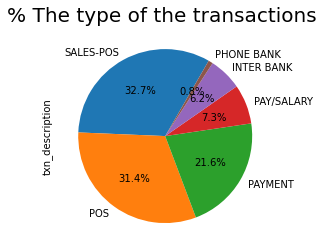

In [70]:
print(df['txn_description'].value_counts())
plt.title('% The type of the transactions ', fontsize=20)
df['txn_description'].value_counts().plot.pie(autopct='%.1f%%', startangle=60)


In [ ]:
df_by_date = type_df.groupby('date').date.count()
df_by_date.iplot(kind='scatter', title='Transasions Per Day')


# For more Insights Check this out!! <hr>

https://public.tableau.com/views/ANZDashBoard/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link